# Predict The Flight Ticket Price

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("C:\\Users\\sampa\\Desktop\\Project\\Data_Train.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10683, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Feature Engineering

In [5]:
data['Date']=data['Date_of_Journey'].str.split('/').str[0]
data['Month']=data['Date_of_Journey'].str.split('/').str[1]
data['Year']=data['Date_of_Journey'].str.split('/').str[2]

In [6]:
data['Date']=data['Date'].astype(int)
data['Month']=data['Month'].astype(int)
data['Year']=data['Year'].astype(int)

In [7]:
data=data.drop(['Date_of_Journey'],axis=1)

In [8]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 959.9+ KB


In [10]:
data['Arrival_Time']=data['Arrival_Time'].str.split(' ').str[0]

In [11]:
data['Arrival_Time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [12]:
data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019


In [13]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [14]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
dtype: int64

In [15]:
data['Total_Stops']=data['Total_Stops'].fillna('1 stop')

In [16]:
data['Total_Stops']=data['Total_Stops'].replace('non-stop','0 stop')

In [17]:
data['Total_Stops'].value_counts()

1 stop     5626
0 stop     3491
2 stops    1520
3 stops      45
4 stops       1
Name: Total_Stops, dtype: int64

In [18]:
data['Stops']=data['Total_Stops'].str.split(' ').str[0]

In [19]:
data['Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Stops, dtype: int64

In [20]:
data['Stops']=data['Stops'].astype(int)

In [21]:
data=data.drop(['Total_Stops'],axis=1)

In [22]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,1,3,2019,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Stops            10683 non-null  int32 
dtypes: int32(4), int64(1), object(8)
memory usage: 918.2+ KB


In [24]:
data['Arrival_Hour']=data['Arrival_Time'].str.split(':').str[0]
data['Arrival_Minute']=data['Arrival_Time'].str.split(':').str[1]
data['Arrival_Hour']=data['Arrival_Hour'].astype(int)
data['Arrival_Minute']=data['Arrival_Minute'].astype(int)

In [25]:
data=data.drop(['Arrival_Time'],axis=1)

In [26]:
data['Dep_Hour']=data['Dep_Time'].str.split(':').str[0]
data['Dep_Min']=data['Dep_Time'].str.split(':').str[1]
data['Dep_Hour']=data['Dep_Hour'].astype(int)
data['Dep_Min']=data['Dep_Min'].astype(int)

In [27]:
data=data.drop(['Dep_Time'],axis=1)

In [28]:
data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302,1,3,2019,1,21,35,16,50


In [29]:
data=data.drop(['Duration'],axis=1)

In [30]:
data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [31]:
data=data.drop(['Additional_Info'],axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Route           10682 non-null  object
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int32 
 6   Month           10683 non-null  int32 
 7   Year            10683 non-null  int32 
 8   Stops           10683 non-null  int32 
 9   Arrival_Hour    10683 non-null  int32 
 10  Arrival_Minute  10683 non-null  int32 
 11  Dep_Hour        10683 non-null  int32 
 12  Dep_Min         10683 non-null  int32 
dtypes: int32(8), int64(1), object(4)
memory usage: 751.3+ KB


In [33]:
data['Route1']=data['Route'].str.split('→ ').str[0]
data['Route2']=data['Route'].str.split('→ ').str[1]
data['Route3']=data['Route'].str.split('→ ').str[2]
data['Route4']=data['Route'].str.split('→ ').str[3]
data['Route5']=data['Route'].str.split('→ ').str[4]

In [34]:
data.head()

,Airline,Source,Destination,Route,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,3897,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7662,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,13882,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,6218,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,13302,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [35]:
data['Route1'].fillna('None',inplace=True)
data['Route2'].fillna('None',inplace=True)
data['Route3'].fillna('None',inplace=True)
data['Route4'].fillna('None',inplace=True)
data['Route5'].fillna('None',inplace=True)

In [36]:
data=data.drop(['Route'],axis=1)

In [37]:
data.isnull().sum()

Airline           0
Source            0
Destination       0
Price             0
Date              0
Month             0
Year              0
Stops             0
Arrival_Hour      0
Arrival_Minute    0
Dep_Hour          0
Dep_Min           0
Route1            0
Route2            0
Route3            0
Route4            0
Route5            0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Price           10683 non-null  int64 
 4   Date            10683 non-null  int32 
 5   Month           10683 non-null  int32 
 6   Year            10683 non-null  int32 
 7   Stops           10683 non-null  int32 
 8   Arrival_Hour    10683 non-null  int32 
 9   Arrival_Minute  10683 non-null  int32 
 10  Dep_Hour        10683 non-null  int32 
 11  Dep_Min         10683 non-null  int32 
 12  Route1          10683 non-null  object
 13  Route2          10683 non-null  object
 14  Route3          10683 non-null  object
 15  Route4          10683 non-null  object
 16  Route5          10683 non-null  object
dtypes: int32(8), int64(1), object(8)
memory usage: 1.1

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Airline']=encoder.fit_transform(data['Airline'])
data['Source']=encoder.fit_transform(data['Source'])
data['Destination']=encoder.fit_transform(data['Destination'])
data['Route1']=encoder.fit_transform(data['Route1'])
data['Route2']=encoder.fit_transform(data['Route2'])
data['Route3']=encoder.fit_transform(data['Route3'])
data['Route4']=encoder.fit_transform(data['Route4'])
data['Route5']=encoder.fit_transform(data['Route5'])

In [40]:
data.head()

,Airline,Source,Destination,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Route1,Route2,Route3,Route4,Route5
0,3,0,5,3897,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,7662,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,13882,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,6218,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,13302,1,3,2019,1,21,35,16,50,0,34,8,12,4


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Airline         10683 non-null  int32
 1   Source          10683 non-null  int32
 2   Destination     10683 non-null  int32
 3   Price           10683 non-null  int64
 4   Date            10683 non-null  int32
 5   Month           10683 non-null  int32
 6   Year            10683 non-null  int32
 7   Stops           10683 non-null  int32
 8   Arrival_Hour    10683 non-null  int32
 9   Arrival_Minute  10683 non-null  int32
 10  Dep_Hour        10683 non-null  int32
 11  Dep_Min         10683 non-null  int32
 12  Route1          10683 non-null  int32
 13  Route2          10683 non-null  int32
 14  Route3          10683 non-null  int32
 15  Route4          10683 non-null  int32
 16  Route5          10683 non-null  int32
dtypes: int32(16), int64(1)
memory usage: 751.3 KB


In [42]:
data_train=data.copy()

# Test Data

In [43]:
data_test=pd.read_excel("C:\\Users\\sampa\\Desktop\\Project\\Test_set.xlsx")
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [44]:
data_test=data_test.drop(['Additional_Info'],axis=1)

In [45]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop


In [46]:
data_test['Date']=data_test['Date_of_Journey'].str.split('/').str[0]
data_test['Month']=data_test['Date_of_Journey'].str.split('/').str[1]
data_test['Year']=data_test['Date_of_Journey'].str.split('/').str[2]

In [47]:
data_test['Date']=data_test['Date'].astype(int)
data_test['Month']=data_test['Month'].astype(int)
data_test['Year']=data_test['Year'].astype(int)

In [48]:
data_test=data_test.drop(['Date_of_Journey'],axis=1)

In [49]:
data_test['Arrival_Time']=data_test['Arrival_Time'].str.split(' ').str[0]

In [50]:
data_test['Total_Stops']=data_test['Total_Stops'].fillna('1 stop')

In [51]:
data_test['Total_Stops']=data_test['Total_Stops'].replace('non-stop','0 stop')

In [52]:
data_test['Stops']=data_test['Total_Stops'].str.split(' ').str[0]

In [53]:
data['Stops']=data['Stops'].astype(int)

In [54]:
data_test=data_test.drop(['Total_Stops'],axis=1)

In [55]:
data_test['Arrival_Hour']=data_test['Arrival_Time'].str.split(':').str[0]
data_test['Arrival_Minute']=data_test['Arrival_Time'].str.split(':').str[1]
data_test['Arrival_Hour']=data_test['Arrival_Hour'].astype(int)
data_test['Arrival_Minute']=data_test['Arrival_Minute'].astype(int)

In [56]:
data_test=data_test.drop(['Arrival_Time'],axis=1)

In [57]:
data_test['Dep_Hour']=data_test['Dep_Time'].str.split(':').str[0]
data_test['Dep_Min']=data_test['Dep_Time'].str.split(':').str[1]
data_test['Dep_Hour']=data_test['Dep_Hour'].astype(int)
data_test['Dep_Min']=data_test['Dep_Min'].astype(int)

In [58]:
data_test=data_test.drop(['Dep_Time'],axis=1)

In [59]:
data_test=data_test.drop(['Duration'],axis=1)

In [60]:
data_test.head()

,Airline,Source,Destination,Route,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6,6,2019,1,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,12,5,2019,1,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21,5,2019,1,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21,5,2019,1,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,24,6,2019,0,2,45,23,55


In [61]:
data_test['Route1']=data_test['Route'].str.split('→ ').str[0]
data_test['Route2']=data_test['Route'].str.split('→ ').str[1]
data_test['Route3']=data_test['Route'].str.split('→ ').str[2]
data_test['Route4']=data_test['Route'].str.split('→ ').str[3]
data_test['Route5']=data_test['Route'].str.split('→ ').str[4]

In [62]:
data_test['Route1'].fillna('None',inplace=True)
data_test['Route2'].fillna('None',inplace=True)
data_test['Route3'].fillna('None',inplace=True)
data_test['Route4'].fillna('None',inplace=True)
data_test['Route5'].fillna('None',inplace=True)

In [63]:
data_test.head()

,Airline,Source,Destination,Route,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Route1,Route2,Route3,Route4,Route5
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6,6,2019,1,4,25,17,30,DEL,BOM,COK,None,None
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,12,5,2019,1,10,20,6,20,CCU,MAA,BLR,None,None
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21,5,2019,1,19,0,19,15,DEL,BOM,COK,None,None
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21,5,2019,1,21,0,8,0,DEL,BOM,COK,None,None
4,Air Asia,Banglore,Delhi,BLR → DEL,24,6,2019,0,2,45,23,55,BLR,DEL,None,None,None


In [64]:
data_test=data_test.drop(['Route'],axis=1)

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data_test['Airline']=encoder.fit_transform(data_test['Airline'])
data_test['Source']=encoder.fit_transform(data_test['Source'])
data_test['Destination']=encoder.fit_transform(data_test['Destination'])
data_test['Route1']=encoder.fit_transform(data_test['Route1'])
data_test['Route2']=encoder.fit_transform(data_test['Route2'])
data_test['Route3']=encoder.fit_transform(data_test['Route3'])
data_test['Route4']=encoder.fit_transform(data_test['Route4'])
data_test['Route5']=encoder.fit_transform(data_test['Route5'])

In [66]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         2671 non-null   int32 
 1   Source          2671 non-null   int32 
 2   Destination     2671 non-null   int32 
 3   Date            2671 non-null   int32 
 4   Month           2671 non-null   int32 
 5   Year            2671 non-null   int32 
 6   Stops           2671 non-null   object
 7   Arrival_Hour    2671 non-null   int32 
 8   Arrival_Minute  2671 non-null   int32 
 9   Dep_Hour        2671 non-null   int32 
 10  Dep_Min         2671 non-null   int32 
 11  Route1          2671 non-null   int32 
 12  Route2          2671 non-null   int32 
 13  Route3          2671 non-null   int32 
 14  Route4          2671 non-null   int32 
 15  Route5          2671 non-null   int32 
dtypes: int32(15), object(1)
memory usage: 177.5+ KB


# TRAIN & TEST

In [67]:
data_train.head()

,Airline,Source,Destination,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Route1,Route2,Route3,Route4,Route5
0,3,0,5,3897,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,7662,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,13882,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,6218,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,13302,1,3,2019,1,21,35,16,50,0,34,8,12,4


In [68]:
data_train.shape

(10683, 17)

In [69]:
data_test.head()

,Airline,Source,Destination,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Route1,Route2,Route3,Route4,Route5
0,4,2,1,6,6,2019,1,4,25,17,30,3,7,5,8,3
1,3,3,0,12,5,2019,1,10,20,6,20,2,29,3,8,3
2,4,2,1,21,5,2019,1,19,0,19,15,3,7,5,8,3
3,6,2,1,21,5,2019,1,21,0,8,0,3,7,5,8,3
4,0,0,2,24,6,2019,0,2,45,23,55,0,13,21,8,3


In [70]:
data_test.shape

(2671, 16)

In [73]:
data_train=data_train[['Airline','Source','Destination','Date','Month','Year','Stops','Arrival_Hour','Arrival_Minute','Dep_Hour','Dep_Min','Route1','Route2','Route3','Route4','Route5','Price']]

In [74]:
data_train.head()

,Airline,Source,Destination,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Min,Route1,Route2,Route3,Route4,Route5,Price
0,3,0,5,24,3,2019,0,1,10,22,20,0,13,24,12,4,3897
1,1,3,0,1,5,2019,2,13,15,5,50,2,25,1,3,4,7662
2,4,2,1,9,6,2019,2,4,25,9,25,3,32,4,5,4,13882
3,3,3,0,12,5,2019,1,23,30,18,5,2,34,3,12,4,6218
4,3,0,5,1,3,2019,1,21,35,16,50,0,34,8,12,4,13302


In [76]:
data_train=data_train.drop(['Year'],axis=1)
data_test=data_test.drop(['Year'],axis=1)

In [78]:
data_train.shape

(10683, 16)

# Model 

In [80]:
final_data=data_train.append(data_test,sort=False)

In [81]:
final_data.shape

(13354, 16)

In [88]:
final_train=final_data[:10683]
final_test=final_data[10683:]

In [89]:
X=final_train.drop(['Price'],axis=1)
y=final_train['Price']

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [96]:
y_pred=rf.predict(X_test)

C:\Users\sampa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


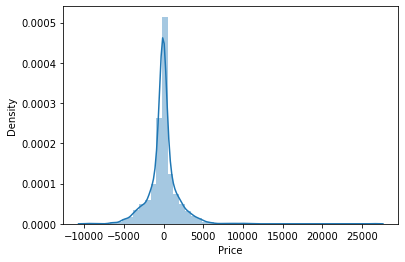

In [100]:
sns.distplot(y_test-y_pred)

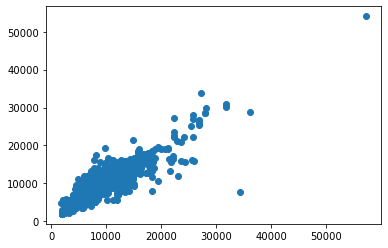

In [101]:
plt.scatter(y_test,y_pred)

In [108]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

3395814.3691630075

In [109]:
mean_squared_error(y_test,y_pred,squared=False)

1842.773553414257

In [110]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8337615881196044